In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
#Check the missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
#study the details of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#find the age of the car
#2021 is the current year
df["Car_Age"] = 2021 - df["Year"]
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [7]:
#drop the year column
#drop carname columns too, since it isnt of any use for our prediction
df.drop(columns= ["Car_Name", "Year"],inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [8]:
#Print the unique values of all categorical features
print("Unique values of all categorical features: ")
print("Fuel Type:", df["Fuel_Type"].unique())
print("Seller Type:", df["Seller_Type"].unique())
print("Transmission:", df["Transmission"].unique())


Unique values of all categorical features: 
Fuel Type: ['Petrol' 'Diesel' 'CNG']
Seller Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']


In [9]:
#Convert the categorical features to dummy  variables
df = pd.get_dummies(df, drop_first= True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [10]:
#find the correlation od the dataset variables
df_corr= df.corr()
df_corr

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


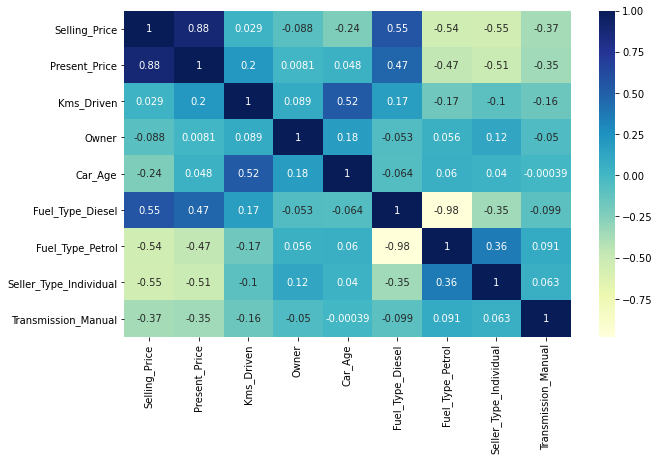

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

plt.show()

- The Selling_Price is positively correlated to the Present price and Fuel_Type_Diesel
- and negatively correlated to Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual and Car_Age

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [13]:
X = df.drop("Selling_Price", axis=1) #Independent features
y = df["Selling_Price"] #Dependent feature

In [14]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [15]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [16]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
ExtReg = ExtraTreesRegressor()
ExtReg.fit(X,y)

ExtraTreesRegressor()

In [17]:
ExtReg.feature_importances_

array([0.36441067, 0.04153463, 0.00088263, 0.07400313, 0.23043549,
       0.01213114, 0.12730155, 0.14930076])

In [18]:
feat_imp = pd.Series(ExtReg.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp

Present_Price             0.364411
Fuel_Type_Diesel          0.230435
Transmission_Manual       0.149301
Seller_Type_Individual    0.127302
Car_Age                   0.074003
Kms_Driven                0.041535
Fuel_Type_Petrol          0.012131
Owner                     0.000883
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

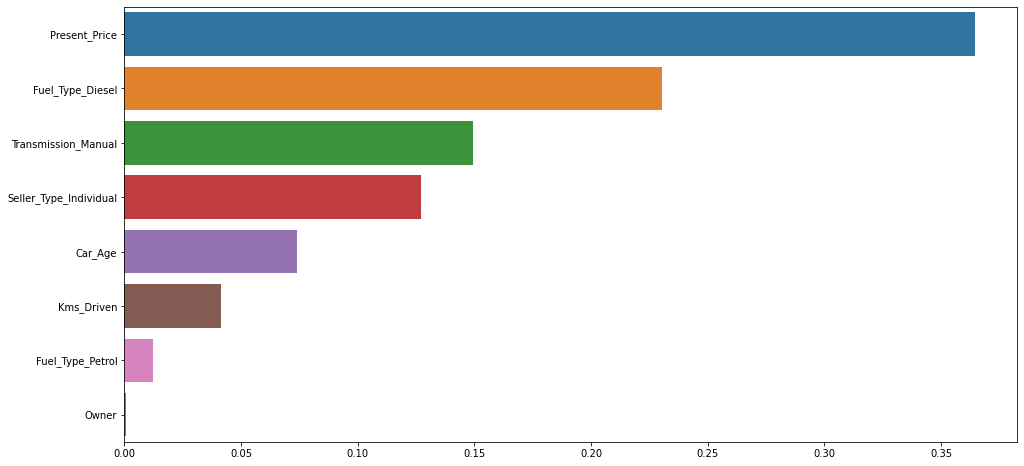

In [19]:
plt.figure(figsize=(16, 8))
sns.barplot(x =feat_imp[:] , y = feat_imp.index )
plt.show

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((201, 8), (100, 8), (201,), (100,))

In [23]:
#Implement Random forest Regressor
#Dont need to scale the values, since Random forest Regressor uses Decsion tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
rf_regr = RandomForestRegressor()

In [47]:
def predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("-"*75)
    print("training_score is : {}".format(model.score(X_train, y_train)))
    print("Testing_Score  is : {}".format(model.score(X_test, y_test)))
    print("-"*75)
    
    # Set up the matplotlib figure
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    fig.suptitle('Prediction Plots', fontsize=15, weight='bold')
    
    plt.subplot(1, 2, 1)
    sns.distplot(y_test-y_pred,color="g")
    plt.style.use('seaborn');
    
    
    plt.subplot(2, 2, 2)
    plt.scatter(y_test,y_pred, color = "r")
    plt.style.use('seaborn');
    plt.title('Scatter Plot');
    plt.xlabel("Selling Price");
    plt.ylabel("Density");
    
    
    plt.tight_layout()
    plt.show()
    print('MAE  is : {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('MSE  is : {}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE  is : {}' .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('r2_score  is : {}'.format(metrics.r2_score(y_test, y_pred)))
    
    print("-"*75)
    return model

---------------------------------------------------------------------------
training_score is : 0.9822803268700221
Testing_Score  is : 0.9582905617621824
---------------------------------------------------------------------------


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


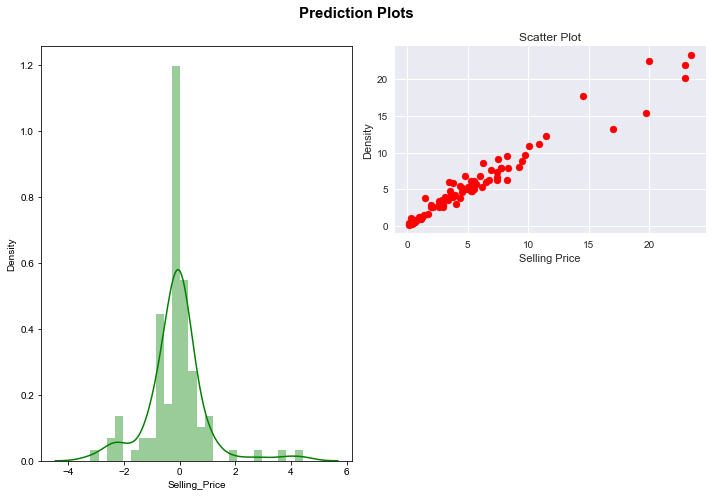

MAE  is : 0.6265250000000004
MSE  is : 1.1158103345000014
RMSE  is : 1.0563192389140705
r2_score  is : 0.9582905617621824
---------------------------------------------------------------------------


In [25]:
predict(rf_regr,X_train, X_test, y_train, y_test)

#### Use the RandomizedSearchCV to search for best hyperparameters

In [34]:
#Hyper Parameters of RandomForestRegressor
n_estimators = [int(x) for x in np.linspace(100, 1200, 12)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(5, 30, 6)]
min_samples_split= [1,2,4,6,7,10,12,15,17]
min_samples_leaf= [1,2,3,5,6,7,10,12]

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
#create a random grid
random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
               "min_samples_split" : min_samples_split,
               "min_samples_leaf" : min_samples_leaf}

In [40]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations

random_search =RandomizedSearchCV(estimator= rf_regr, param_distributions = random_grid, 
                                  n_iter=10, scoring="neg_mean_squared_error", 
                                  n_jobs=1, cv=5, verbose=2, random_state=42)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1100; total time=   1.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1100; total time=   1.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1100; total time=   1.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1100; total time=   1.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1100; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=17, n_estimators=900; total time=   1.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=17, n_estimators=900; total time=   1.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=12, min_samples_split=17, n_estima

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.3s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.3s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.3s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.5s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.4s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=1, n_estimators=1100; total time=   0.6s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=1, n_estimators=1100; total time=   0.5s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=1, n_estimators=1100; total time=   0.5s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=1, n_estimators=1100; total time=   0.5s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=1, n_estimators=1100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=1100; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=1100; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=1100; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=1100; total time=   1.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, n_estimators=700; total time=   0.2s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, n_estimators=700; total time=   0.2s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, n_estimators=700; total time=   0.2s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, n_estimators=700; total time=   0.2s


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packag

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=1, n_estimators=700; total time=   0.2s
---------------------------------------------------------------------------
training_score is : -2.728352485706803
Testing_Score  is : -3.171217214530301
---------------------------------------------------------------------------


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


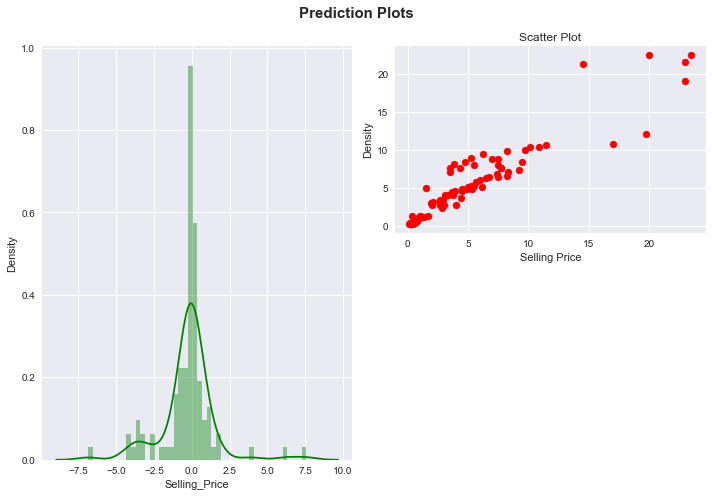

MAE  is : 0.9678820775835635
MSE  is : 3.171217214530301
RMSE  is : 1.7807911765645912
r2_score  is : 0.8814586274580204
---------------------------------------------------------------------------


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 6, 7,
                                                             10, 12],
                                        'min_samples_split': [1, 2, 4, 6, 7, 10,
                                                              12, 15, 17],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
predict(random_search, X_train, X_test, y_train, y_test)

In [49]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 17,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [50]:
import pickle

In [56]:
pickle.dump(random_search,open("car_price_predict_model.pkl", "wb"))

In [57]:
rand_forest = pickle.load(open("car_price_predict_model.pkl",'rb'))

In [58]:
pred = rand_forest.predict(X_test)

In [59]:
metrics.r2_score(y_test,pred)

0.8814586274580204